In [3]:
%pylab
%pylab inline
%load_ext autoreload
%autoreload 2
import numpy as np
import itertools
import collections
from k_means import (K_MEANS, find_best_grouping)

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


In [7]:
with open('datasets/Korsarak/kosarak.dat') as f:
    kosarak = [[int(y) - 1 for y in x.split()] for x in f]

In [9]:
apperance = collections.defaultdict(int)
for x in kosarak:
    for y in x:
        apperance[y] += 1

In [11]:
apperance_list = list(apperance.items())
apperance_list.sort(reverse=True, key=lambda x: x[1])

In [12]:
T = 1000
our_products = dict(apperance_list[:T])
for i, x in enumerate(our_products):
    our_products[x] = i


In [13]:
buying_matrix = np.zeros((len(set(itertools.chain(*kosarak))),T))
for x in kosarak:
    for y in x:
        for z in x:
            if z in our_products:
                buying_matrix[y, our_products[z]] += 1
for Id, index in our_products.items():
    buying_matrix[Id][index] = 0
# buying_matrix = np.load('datasets/Korsarak/matrix')


In [14]:
def plot_kmeans(data, data_tragets, data_labels, title, K=3, **args):
#     r, grouping = K_MEANS(data, K)
    r = args['r']
    grouping = args['grouping']
    
    data = np.clip(data.copy(), 0, 20000)
    r = np.clip(r.copy(), 0, 20000)
    size = data.shape[1] if args.get('shrink') is None else args['shrink']
    fig, axes = plt.subplots(size, size)
    for i in range(size):
        for j in range(size):
            if i == j:
                axes[i][0].set_ylabel(data_labels[i])
                axes[size-1][i].set_xlabel(data_labels[i])
            else:
                axes[i][j].scatter(data[:,i], data[:,j], c=grouping)
                axes[i][j].scatter(r[:, i], r[:, j], marker='x' , c='r')

    fig.set_size_inches(25, 25)
    plt.suptitle(f'{title} grouped', fontsize=50)
    plt.legend()
    plt.show()

In [15]:
r, grouping = K_MEANS(buying_matrix, 10)

No handles with labels found to put in legend.


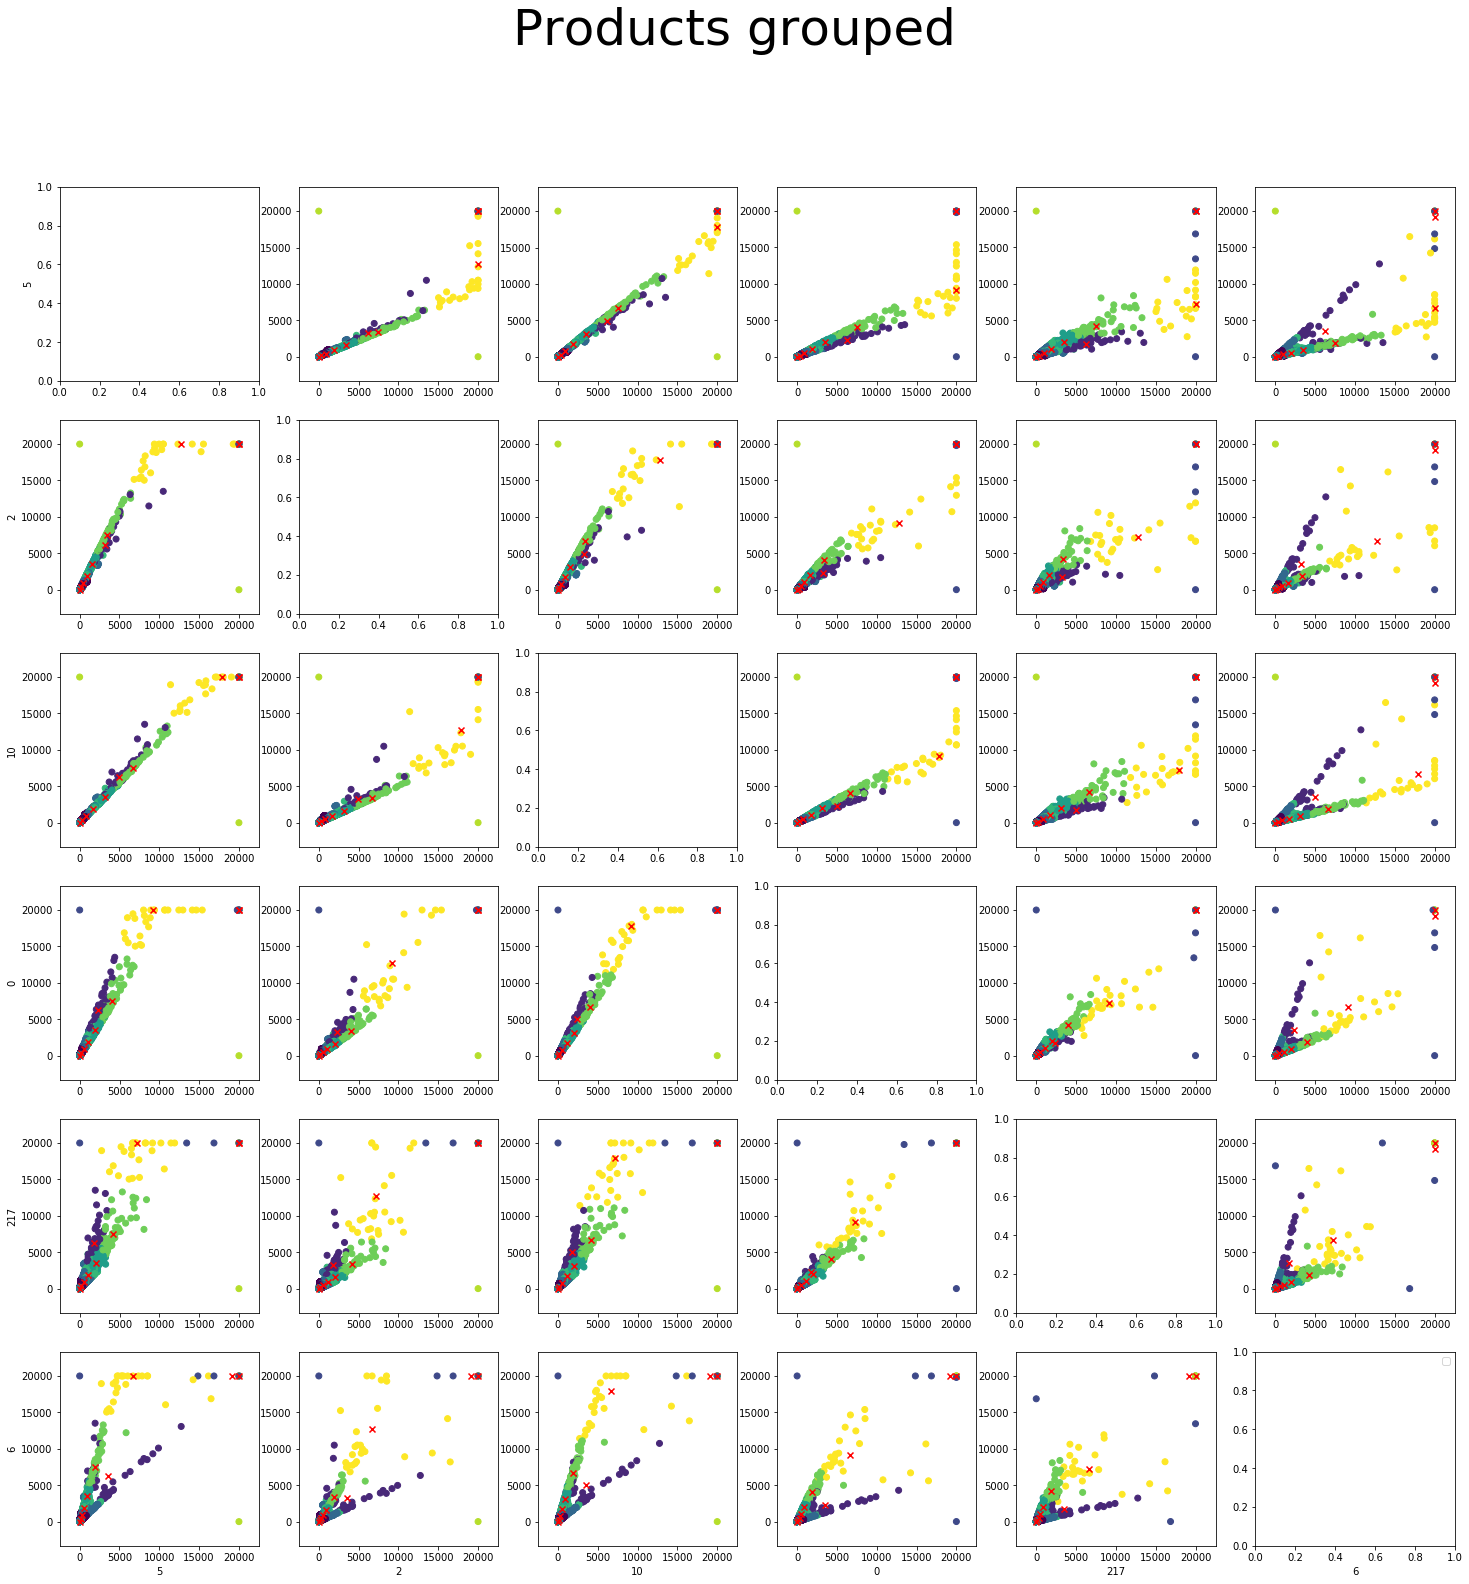

In [16]:
plot_kmeans(
    buying_matrix,
    None,
    list(our_products.keys()),
    'Products',
    K=10,
    shrink=6,
    r=r,
    grouping=grouping
)